### Ch02. Supervised Learning

In [1]:
# import
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from scipy.stats import sem


import sklearn as sk
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

C:\tools\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
fo = fetch_olivetti_faces()
print(fo.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [3]:
# metadata details abt faces
print(fo.keys())

dict_keys(['data', 'images', 'DESCR', 'target'])


In [4]:
# checking out shapes
print(fo.images.shape, fo.data.shape, fo.target.shape)

(400, 64, 64) (400, 4096) (400,)


In [5]:
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
    hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], 
        yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

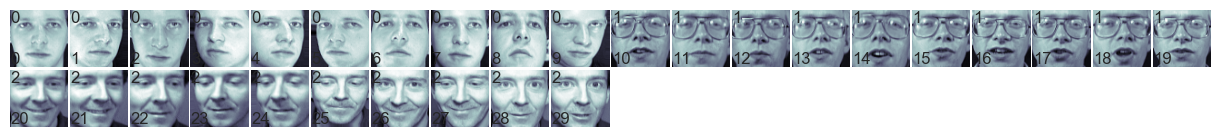

In [6]:
print_faces(fo.images, fo.target, 30)

In [7]:
# instantiate
svm_linear = sk.svm.SVC(kernel='linear')

# splitting the data into train n test
X_train, X_test, y_train, y_test = train_test_split(fo.data, fo.target, test_size=0.25, random_state=33)
print(len(X_train), len(y_train))

300 300


In [8]:
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score 
    # method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))

In [9]:
evaluate_cross_validation(svm_linear, X_train, y_train, 5)

[ 0.96666667  0.96666667  0.95        0.88333333  0.88333333]
Mean score: 0.930 (+/-0.019)


In [10]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print( "Accuracy on training set:")
    print( clf.score(X_train, y_train))
    print( "Accuracy on testing set:")
    print( clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print( "Classification Report:")
    print( metrics.classification_report(y_test, y_pred))
    print( "Confusion Matrix:")
    print( metrics.confusion_matrix(y_test, y_pred))

In [11]:
train_and_evaluate(svm_linear, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.97
Classification Report:
             precision    recall  f1-score   support

          0       0.83      1.00      0.91         5
          1       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         3
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         1
         11       1.00      1.00      1.00         1
         12       1.00      0.50      0.67         2
         13       1.00      1.00      1.00         1
         14       0.60      1.00      0.75         3
         15       1.00      0.50      0.67         2
         17       1.00      1.00      1.00         2
         18    